In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 36kB/s 


In [2]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Embedding , Dense, Bidirectional
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Eluvio_DS_Challenge.csv')
data.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [6]:
data.shape

(509236, 8)

In [7]:
X = data['title']
Y = data['up_votes']

In [8]:
print(X.shape,Y.shape)

(509236,) (509236,)


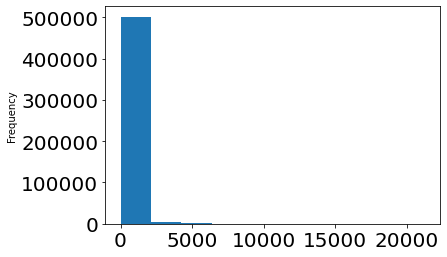

In [9]:
Y[0:].plot(kind = 'hist', fontsize=20)

In [10]:

enc = OneHotEncoder()
Y_OHE = enc.fit_transform(np.expand_dims(Y[0:250000],1)).toarray()

In [11]:
Y_OHE.shape

(250000, 3124)

In [12]:
ps = PorterStemmer()
corpus = []
for i in range(250000):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', X[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
245000
245001
245002
245003
245004
245005
245006
245007
245008
245009
245010
245011
245012
245013
245014
245015
245016
245017
245018
245019
245020
245021
245022
245023
245024
245025
245026
245027
245028
245029
245030
245031
245032
245033
245034
245035
245036
245037
245038
245039
245040
245041
245042
245043
245044
245045
245046
245047
245048
245049
245050
245051
245052
245053
245054
245055
245056
245057
245058
245059
245060
245061
245062
245063
245064
245065
245066
245067
245068
245069
245070
245071
245072
245073
245074
245075
245076
245077
245078
245079
245080
245081
245082
245083
245084
245085
245086
245087
245088
245089
245090
245091
245092
245093
245094
245095
245096
245097
245098
245099
245100
245101
245102
245103
245104
245105
245106
245107
245108
245109
245110
245111
245112
245113
245114
245115
245116
245117
245118
245119
245120
245121
245122
245123
245124
245125
245126
245127
245128
245129
245130
245131
245132
245133
245134
2451

In [13]:
voc_size = 50000
onehot_rep = [one_hot(word, voc_size) for word in corpus]
embedded_doc = pad_sequences(onehot_rep, padding = 'pre', maxlen = 35)
Xf = np.array(embedded_doc)
features = 250

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val , Y_train , Y_val= train_test_split(Xf[0:250000] , Y_OHE[0:250000] , test_size = 0.2 , random_state = 21)

In [15]:
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(200000, 35) (200000, 3124) (50000, 35) (50000, 3124)


In [16]:
model = Sequential()
model.add(Embedding(voc_size , features , input_length = 35))
model.add(Bidirectional(LSTM(256 , return_sequences=True)))
model.add(LSTM(100))
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(3124, activation ='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' ,metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 250)           12500000  
_________________________________________________________________
bidirectional (Bidirectional (None, 35, 512)           1038336   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               245200    
_________________________________________________________________
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
dense_1 (Dense)              (None, 3124)              802868    
Total params: 14,612,260
Trainable params: 14,612,260
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10 , batch_size = 32, verbose = 1)

Epoch 1/10
6250/6250 [==============================] - 571s 88ms/step - loss: 3.8457 - accuracy: 0.2100 - val_loss: 3.7321 - val_accuracy: 0.2135
Epoch 2/10
6250/6250 [==============================] - 549s 88ms/step - loss: 3.7046 - accuracy: 0.2113 - val_loss: 3.6961 - val_accuracy: 0.2135
Epoch 3/10
6250/6250 [==============================] - 548s 88ms/step - loss: 3.6563 - accuracy: 0.2111 - val_loss: 3.6912 - val_accuracy: 0.2135
Epoch 4/10
6250/6250 [==============================] - 548s 88ms/step - loss: 3.5956 - accuracy: 0.2126 - val_loss: 3.7073 - val_accuracy: 0.2135
Epoch 5/10
6250/6250 [==============================] - 548s 88ms/step - loss: 3.5579 - accuracy: 0.2108 - val_loss: 3.7338 - val_accuracy: 0.2135
Epoch 6/10
6250/6250 [==============================] - 551s 88ms/step - loss: 3.5026 - accuracy: 0.2118 - val_loss: 3.7825 - val_accuracy: 0.2135
Epoch 7/10
6250/6250 [==============================] - 555s 89ms/step - loss: 3.4374 - accuracy: 0.2126 - val_loss: 3

In [18]:
model.save('final.h5')

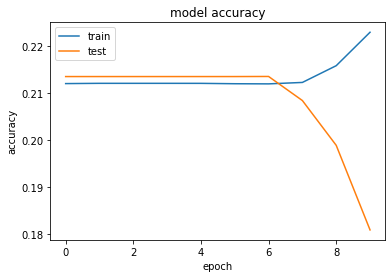

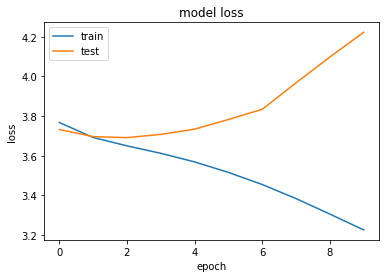

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()